In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import GradientBoostingClassifier

import pickle

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv("../data/heart.csv")

In [7]:
df.isna().sum().sum()

0

In [9]:
X = df.drop(["target"], axis=1)
y = df["target"]

In [10]:
X.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Baseline

In [12]:
gb = GradientBoostingClassifier()

In [13]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [14]:
scores = gb.predict_proba(X_test)
y_pred = gb.predict(X_test)

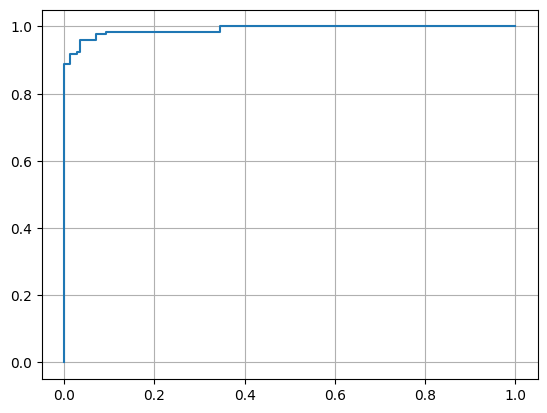

In [15]:
plt.plot(
    roc_curve(y_test, scores[:, 1], pos_label=1)[0],
    roc_curve(y_test, scores[:, 1], pos_label=1)[1]
)
plt.grid()

In [16]:
print(f'roc_auc = {roc_auc_score(y_test, scores[:, 1])}')

roc_auc = 0.9902534113060428


In [17]:
filename = "../model/gradient_boosting_model.pickle"

In [18]:
pickle.dump(gb, open(filename, "wb"))

In [19]:
loaded_model = pickle.load(open(filename, "rb"))

In [20]:
X_test.iloc[55:56, :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2


In [21]:
loaded_model.predict(X_test.iloc[55:56, :])

array([1])

In [22]:
y_test.iloc[55]

1